## Deep Learning Frameworks
The feed forward, error correction, back propagation, all the math etc are carrried out by the deep learning frameworks. Erstwhile frameworks - Caffe/2, Theano, Torch. As of today there are 2 popular frameworks - Tensorflow and Pytorch. Tensorflow controlled by Alphabet and Pytorch by Meta. Keras is wrapper around tensorflow. It was started as an abstraction which works on both Theano and Tensorflow. Later keras was taken over by google and was made the officail API of the tensorflow.

In [37]:
! pip show tensorflow
# To install tensor flow
# ! pip install tensorflow
# Keras is already inside tensorflow, no need for any installation

Name: tensorflow
Version: 2.9.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\rdharmana\anaconda3\lib\site-packages
Requires: setuptools, libclang, keras-preprocessing, numpy, opt-einsum, tensorboard, tensorflow-estimator, typing-extensions, h5py, wrapt, termcolor, packaging, grpcio, keras, absl-py, gast, protobuf, tensorflow-io-gcs-filesystem, astunparse, six, flatbuffers, google-pasta
Required-by: 


In [38]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
print(tf.__version__)
print(tf.keras.__version__)

2.9.0
2.9.0


## MNIST database
It is a database of digit images to help identify the digits written on a postal pin code. The numbers 0 to 9 were hand written by students, images of which are stored in the database. These are single channel images (grey scale) with size 28x28 and contains 60 thousand training images(digits) and 10 thousand test images. A digit image will go into the deep learning model and the model has to predict the digit.

In [40]:
# Download the data
# x - input - images
# y - output - digits/labels
# both x and y are numpy arrays
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Training - this data will be used to train the model
# Testing - this data will be used to test its accuracy
# Tensorflow uses tensors instead of numpy arrays to improve speed and efficiency. 
# Tensors are arrays designed for accelerator memory like GPU and they are immutable

In [41]:
print(x_train.shape) # number of images, image height, image width
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [42]:
# Get the first image
sample_image = x_train[0]
print(sample_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

5


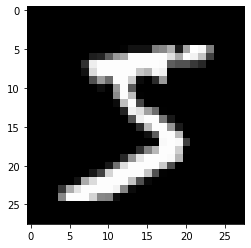

In [43]:
plt.imshow(sample_image, cmap='gray')
print(y_train[0]) # y actual for this image

In [44]:
#This function will pick images from the dataset
#plot the image and print its correct lable
def plot_digits(random_number):
    if random_number >= 60000:
        return "Train data set has only 60k images"
    random_image = x_train[random_number]
    plt.imshow(random_image, cmap='gray')
    print(y_train[random_number])

9


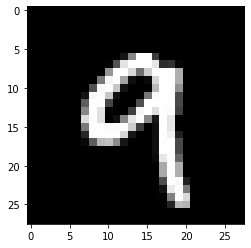

In [45]:
plot_digits(110)

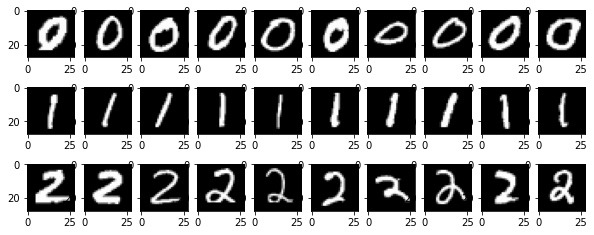

In [46]:
# Plot multiple images
# Print 10 images of 0, 10 images of 1 and 10 images of 2

#get indexes where 0,1 and 2 digit images are present
zero_image_indexes = np.random.choice(np.where(y_train == 0)[0], 10)
one_image_indexes = np.random.choice(np.where(y_train == 1)[0], 10)
two_image_indexes = np.random.choice(np.where(y_train == 2)[0], 10)

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(3, 10, i+1)
    plt.imshow(x_train[zero_image_indexes[i]], cmap='gray')
    plt.subplot(3, 10, 10+i+1)
    plt.imshow(x_train[one_image_indexes[i]], cmap='gray')
    plt.subplot(3, 10, 20+i+1)
    plt.imshow(x_train[two_image_indexes[i]], cmap='gray')

In [47]:
# Is this data set class wise balanced
pd.DataFrame(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [48]:
# Scaling to value between 0 and 1 (divide x_train with max pixel value posible 255.0)
x_train = x_train/255.0 # this does not alter the image since the ratio of different pixels is still the same

In [49]:
# Encoding - MNIST model has to yield 10 different outputs(0 t0 9) - One hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
print(y_train.shape)
y_train[0]

(60000, 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [58]:
# Modelling : In keras there 2 types of modelling - Sequential and Functional, for this one we will use Sequencial
# Sequential - Every later will connect to the next layer only
# Funtional - When we want one layer to connect to multiple layers, we use the functional API
# Create a empty sequential model
model = tf.keras.models.Sequential()

In [60]:
# 2 D images(28 X 28) have to be converted to 1 D( column of size 784) to give all pixels of image to input nodes at once
# Flattening does this, converts 2 D image to 1 D, by placing one over the other
model.add(tf.keras.layers.Input((28,28), name="Input")) # Add the input layer, give it the image size
model.add(tf.keras.layers.Flatten(name="Flat")) # Add the flatten layer

In [61]:
# Hidden layer(also called dense layers)
model.add(tf.keras.layers.Dense(100, activation = tf.keras.activations.relu, name="Hidden")) # give it the number of neurons and activation function
# Output layer(also called dense layer)
model.add(tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax, name="Output")) # 10 neurons since 10 possible output categories

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flat (Flatten)              (None, 784)               0         
                                                                 
 Hidden (Dense)              (None, 100)               78500     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# In the above summary, Output Shape is showing the number of neurons in each layer
# Param is the number of weights and bias in eah layer. 
# For example in the Hidden layer above, 
# number of weights =  number of neurons in the previous layer *  number of neurons in the current layer = 784 * 100 = 78400, 
# numner of biases = number of neurons in the current layer = 100, 
# hence total Params = 78400 + 100 = 78500 (these are tranabe parameters during back propagation)

In [57]:
#delete the model
#del model # need to delete the model if we have to re run the model

In [64]:
# Define the loss function and also optimizer to use for back propagation
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["acc"]) # we can give the learning rate here, else it defaults to 0.001

In [66]:
# Epochs = 1 cycle of all data has gone through FF, EC and BP
model.fit(x=x_train, y=y_train, epochs=10, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3839 - acc: 0.8952 - val_loss: 0.3049 - val_acc: 0.9223
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3742 - acc: 0.8973 - val_loss: 0.2977 - val_acc: 0.9233
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3657 - acc: 0.8994 - val_loss: 0.2913 - val_acc: 0.9235
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3581 - acc: 0.9015 - val_loss: 0.2860 - val_acc: 0.9248
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3513 - acc: 0.9030 - val_loss: 0.2807 - val_acc: 0.9270
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3451 - acc: 0.9048 - val_loss: 0.2761 - val_acc: 0.9262
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3394 - acc: 0.9060 - val_loss: 0.2716 - val_acc: 0.9285
Epoch 8/10
1688/1688 [==============================] - 2s 1ms

In [68]:
# Model has got around 92% accuracy
model.input_shape # number of images(None) X W X H

(None, 28, 28)

6

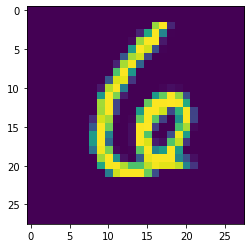

In [67]:
# Let us test the model on unseen data
plt.imshow(x_test[123])
y_test[123]

In [76]:
def predict(num):
    plt.imshow(x_test[num])
    image = x_test[num]
    image = image/255.0 # scale the image
    image = np.expand_dims(image, axis=0) # expand one diemnsion to match the required input shape
    result = model.predict(image)
    print(f"Modle predicted: {np.argmax(result)} with confidence of {result.max()}")
    print(f"Correct label: {y_test[num]}")

1/1 [==============================] - 0s 20ms/step
Modle predicted: 9 with confidence of 0.8681176900863647
Correct label: 9


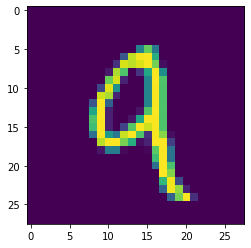

In [77]:
predict(125)